# PROBLEM STATEMENT

### CONTEXT
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### ANALYSIS
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## IMPORT LIBRARIES

In [1717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,f_oneway,chi2_contingency,shapiro,norm,kstest
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [1718]:
df=pd.read_csv(r"C:\Users\gokul\OneDrive\Desktop\SCALER\JAMBOREE\jamboree - Copy.csv")

In [1719]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Feature Details

1. Serial No. (Unique row ID)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5)
5. Statement of Purpose and Letter of Recommendation Strength (out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

In [1720]:
df.drop(['Serial No.'],inplace=True,axis=1)

Column - Serial No is dropped since it will not add much value in the analysis

In [1721]:
df.shape

(500, 8)

There are 500 data points and 8 features

In [1722]:
df.duplicated().value_counts()

False    500
dtype: int64

There are no duplicates present

In [1723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There are no missing values present in the dataset

In [1724]:
#------------------------COUNT OF UNIQUE VALUES IN COLUMNS----------------------------------#
count_of_unique=[]
columns_=[]
for i in df.columns:
    columns_.append(i)
    count_of_unique.append(df[i].nunique())
pd.DataFrame({'Columns':columns_,'Count of Columns':count_of_unique})

,Columns,Count of Columns
0,GRE Score,49
1,TOEFL Score,29
2,University Rating,5
3,SOP,9
4,LOR,9
5,CGPA,184
6,Research,2
7,Chance of Admit,61


## UNIVARIATE ANALYSIS

###  STATISTICAL SUMMARY

In [1725]:
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### DISTRIBUTIONS OF ALL THE FEATURES

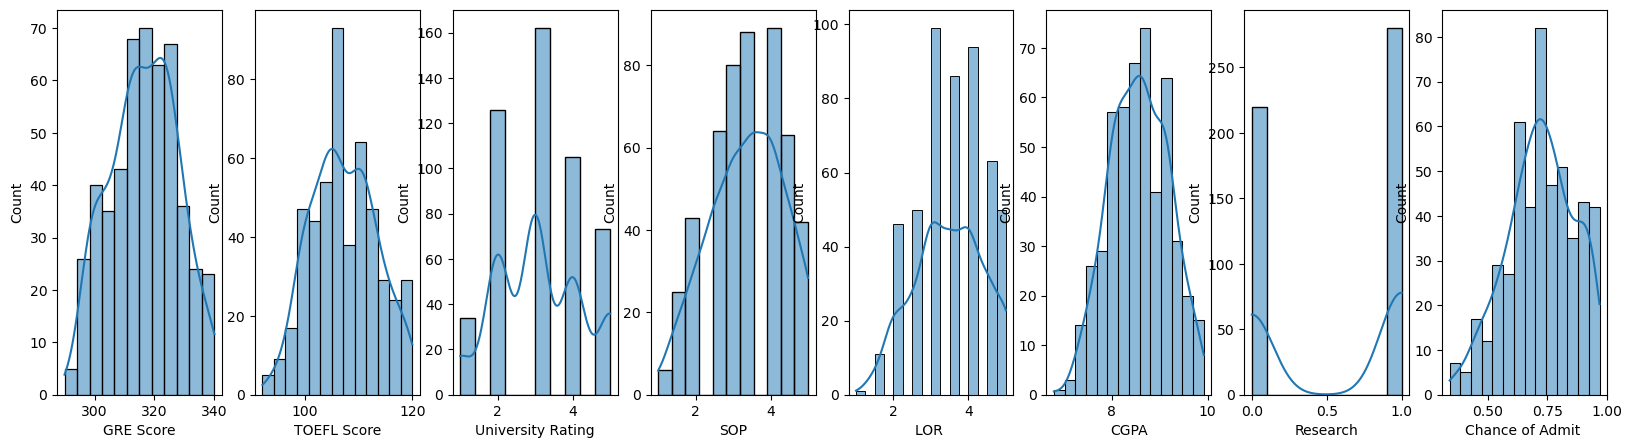

In [1726]:
cols=df.columns
fig=plt.figure(figsize=(20,5))
j=1
for i in cols:
    plt.subplot(1,len(cols),j)
    sns.histplot(df[i],kde=True)
    j+=1

### BOXPLOT OF ALL THE FEATURES

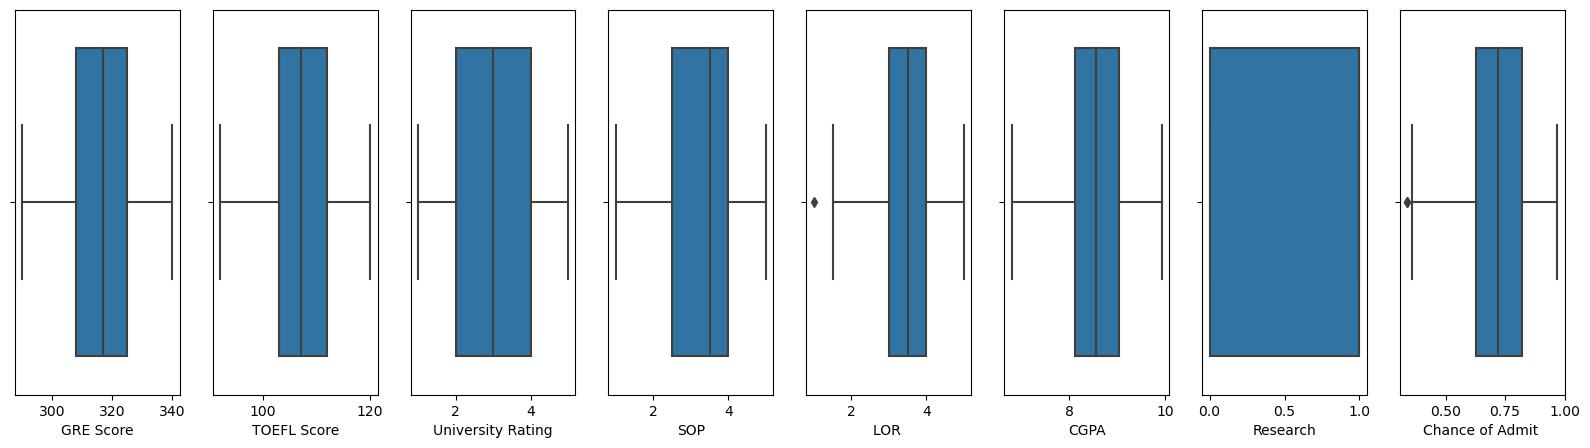

In [1727]:
cols=df.columns
fig=plt.figure(figsize=(20,5))
j=1
for i in cols:
    plt.subplot(1,len(cols),j)
    sns.boxplot(df[i])
    j+=1

As per the univariate analysis, below mentioned are the inferences: 
1. Median GRE score is around **317** with almost similar number of students having scores above & below 317 
2. Median TOEFL Score is around **107** with almost similar number of students having scores above & below 107 
3. Median University Rating is around **3** with almost similar number of students admitted to universities with ratings above & below 3
4. Median SOP & LOR rating is around **3.5** with higher number of students having SOP rating between 3.5 - 5 and hence the distribution is left skewed 
5. Median CGPA is around **8.6** with minimum at 6.8 & maximum at 9.92
6. There are higher number of students with research experience than those without research experience

## BIVARIATE ANALYSIS

### GRE SCORE, TOEFL SCORE, CGPA VS CHANCE OF ADMIT

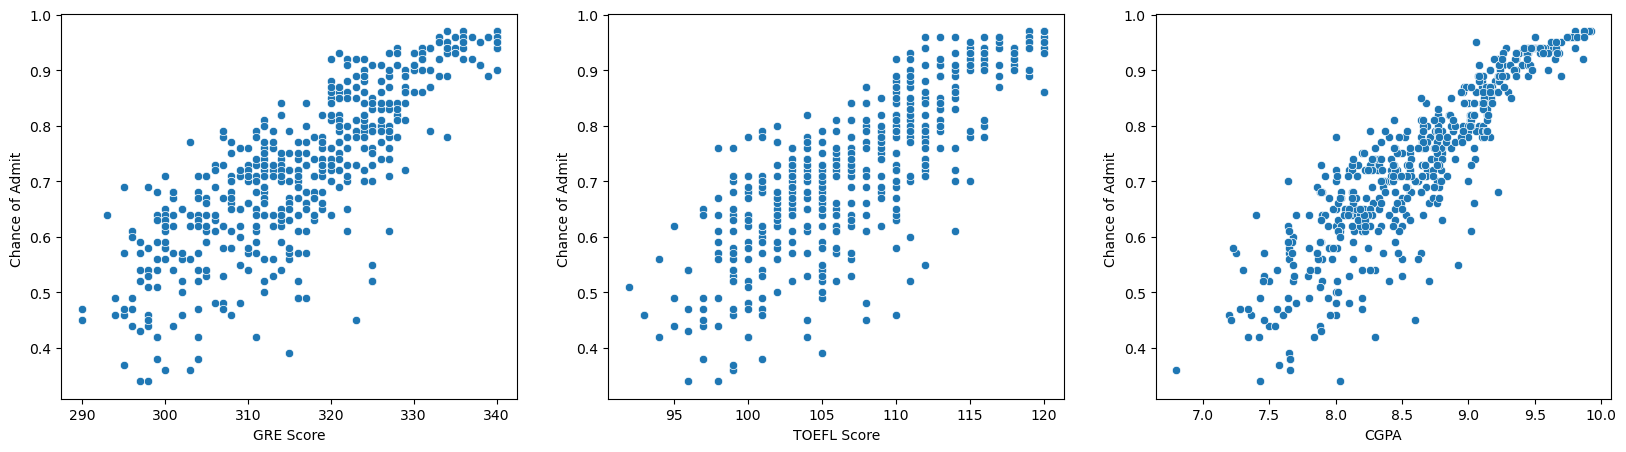

In [1728]:
cols=['GRE Score', 'TOEFL Score','CGPA']
fig=plt.figure(figsize=(20,5))
j=1
for i in cols:
    plt.subplot(1,len(cols),j)
    sns.scatterplot(df[i],df['Chance of Admit '])
    j+=1

In [1729]:
#---------------------------------------CORRELATION TEST-------------------------------------------#
cols=['GRE Score', 'TOEFL Score','CGPA']
p=[]
col=[]
corelation=pd.DataFrame()
for i in cols:
    stat,p_val=pearsonr(df[i],df['Chance of Admit '])
    p.append(p_val)
    col.append(i)
corelation['Features']=col
corelation['P_value']=p
corelation

,Features,P_value
0,GRE Score,1.088404e-117
1,TOEFL Score,6.729927e-109
2,CGPA,3.396545e-165


1. Correlation between GRE score, TOEFL score, CGPA and Chance of Admit is statistically significant 
2. As the 3 features increases, chance of admit also increases

### GRE SCORE, TOEFL SCORE, CGPA VS UNIVERSITY RATING

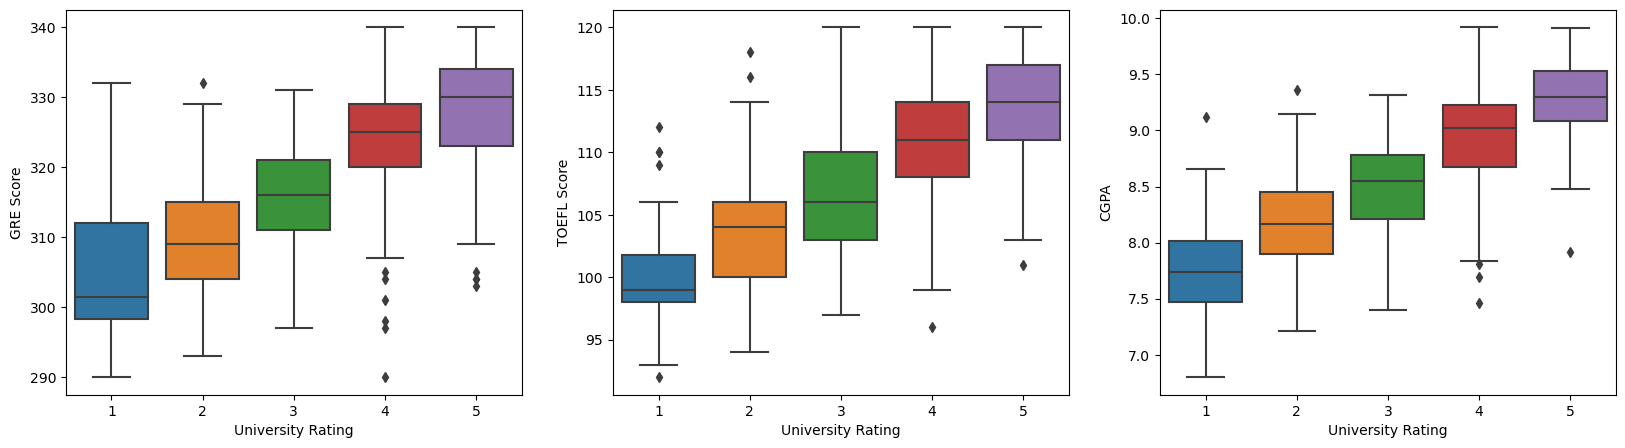

In [1730]:
cols=['GRE Score', 'TOEFL Score','CGPA']
fig=plt.figure(figsize=(20,5))
j=1
for i in cols:
    plt.subplot(1,len(cols),j)
    sns.boxplot(x=df['University Rating'],y=df[i])
    j+=1

In [1731]:
#---------------------------------------ANOVA TEST-------------------------------------------#
cols=['GRE Score', 'TOEFL Score','CGPA']
p=[]
col=[]
anova_df=[]
for i in cols:
    for j in df['University Rating'].unique():
        anova_df.append(df[df['University Rating']==j][i])
    stat,p_val=f_oneway(*anova_df)
    p.append(p_val)
    col.append(i)
corelation['Features']=col
corelation['P_value']=p
corelation

,Features,P_value
0,GRE Score,2.237373e-55
1,TOEFL Score,0.000000e+00
2,CGPA,0.000000e+00


1. GRE score, TOEFL score, CGPA have statistically significant influence on the university ratings
2. As the scores increases, there is high chance that the student will get admitted to better universities with higher ratings

### LOR VS UNIVERSITY RATING

In [1732]:
pd.crosstab(index=df['LOR '],columns=df['University Rating'])

University Rating,1,2,3,4,5
LOR,,,,,
1.0,1,0,0,0,0
1.5,5,5,1,0,0
2.0,11,22,10,3,0
2.5,5,19,16,10,0
3.0,7,34,48,7,3
3.5,3,27,34,14,8
4.0,2,17,32,26,17
4.5,0,2,13,31,17
5.0,0,0,8,14,28


Since there are values less than 5 in all of the rows and columns, chi square test is not feasible to confirm the influence of LOR on admission into better universities with higher rankings

### SOP VS UNIVERSITY RATING

In [1733]:
pd.crosstab(index=df['SOP'],columns=df['University Rating'])

University Rating,1,2,3,4,5
SOP,,,,,
1.0,5,1,0,0,0
1.5,11,12,0,2,0
2.0,9,19,14,1,0
2.5,3,42,16,3,0
3.0,4,28,34,12,2
3.5,2,11,61,11,3
4.0,0,10,30,31,18
4.5,0,3,5,32,23
5.0,0,0,2,13,27


Since there are values less than 5 in all of the rows and columns, chi square test is not feasible to confirm the influence of SOP on admission into better universities with higher rankings

### RESEARCH VS UNIVERSITY RATING

In [1734]:
cross_tab_research=pd.crosstab(index=df['Research'],columns=df['University Rating'])
cross_tab_research

University Rating,1,2,3,4,5
Research,,,,,
0,24,89,75,23,9
1,10,37,87,82,64


Chi square test is feasible to check the influence of Research feature on admission into better universities with higher rankings 

In [1735]:
chi_stat,p_val,dof,exp_values=chi2_contingency(cross_tab_research)
p_val

4.4936229585994394e-20

1. Student having research experience or not is having an effect on university admissions
2. Universities with rating <=2 admit students without research experience while universities with higher ratings needs experience in research
3. There is also a possibility than students with research experience is mostly opting for universities with higher ratings and it is very less likely that they opt for universities with lower ratings

## MULTIVARIATE ANALYSIS

### PAIRPLOT

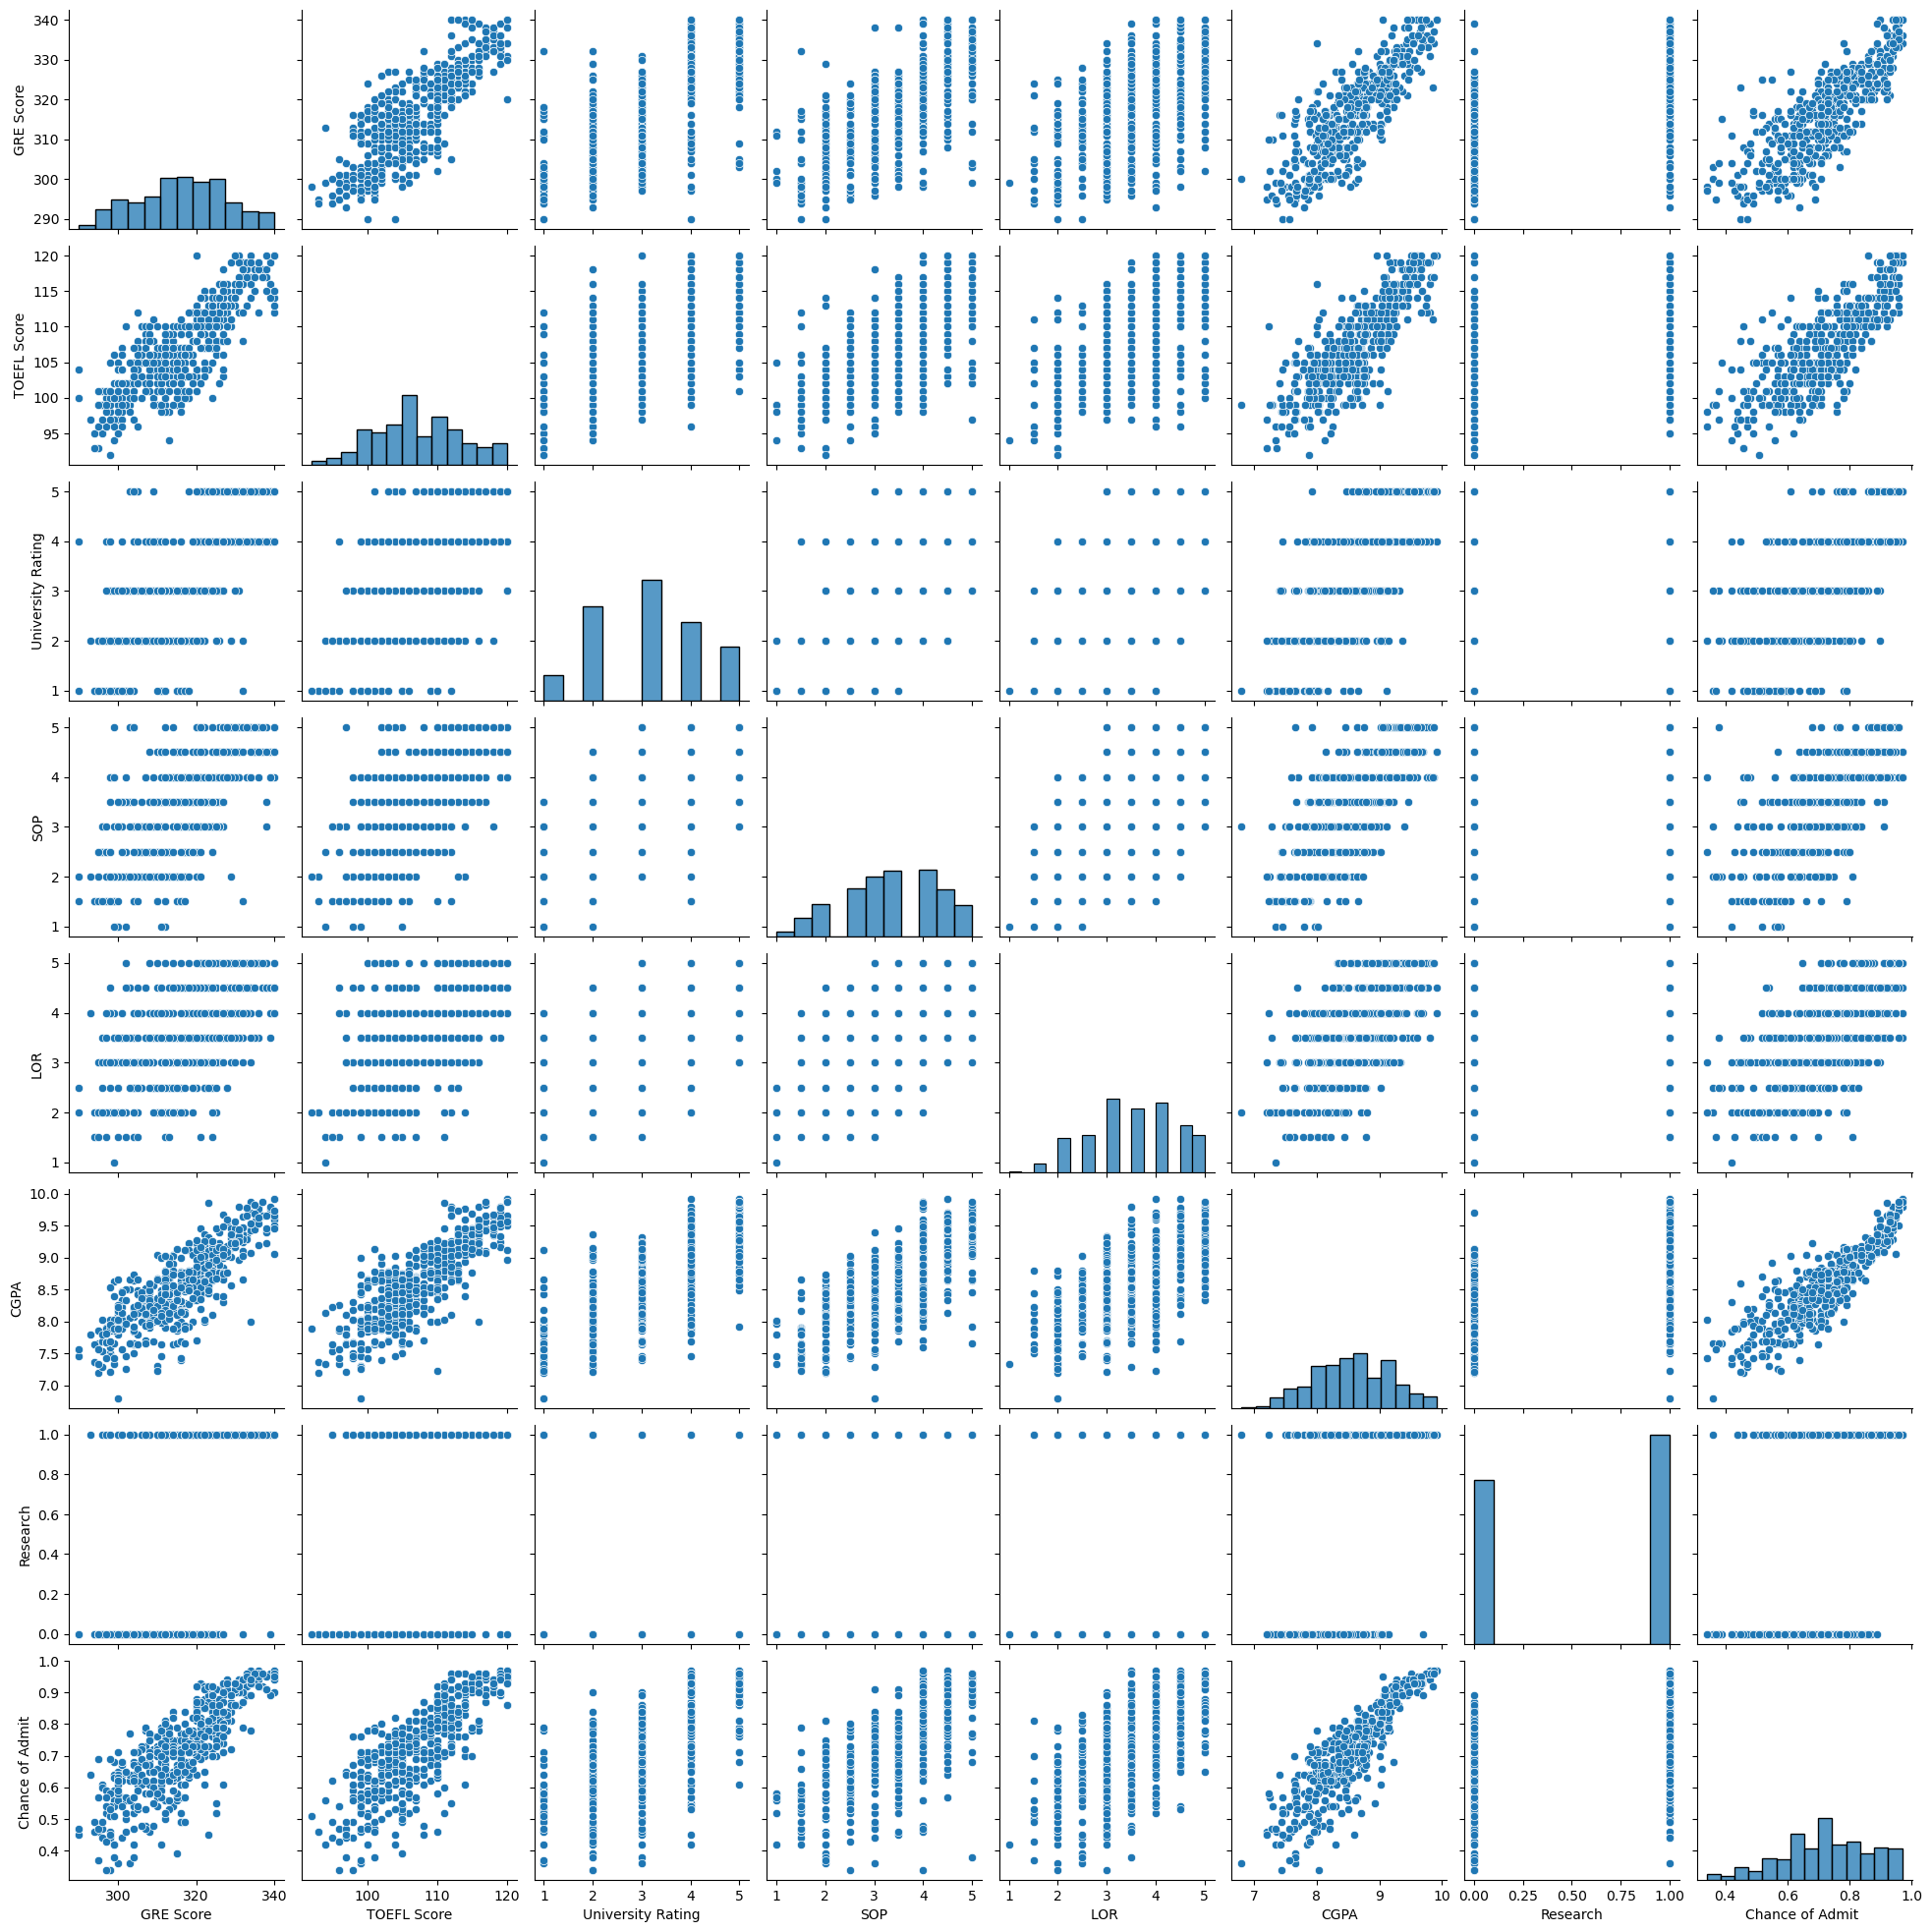

In [1736]:
sns.pairplot(df)

### HEATMAP

<AxesSubplot:>

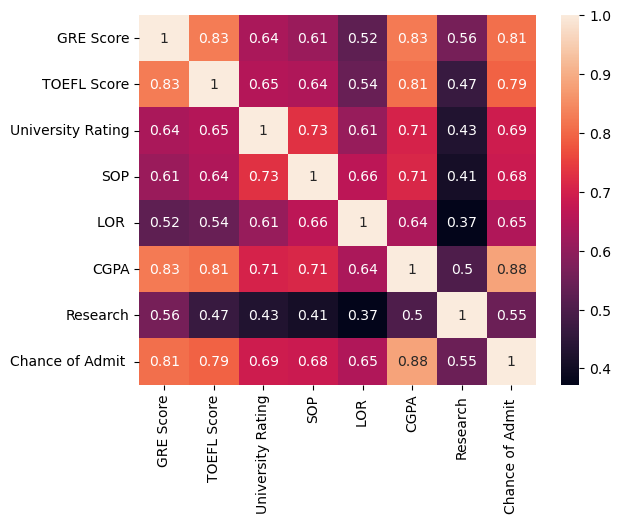

In [1737]:
sns.heatmap(df.corr(method='pearson'),annot=True)

1. All the features have positive correlation with chance of admit
2. All the continuous variables have linear relation with the target variable

## OUTLIER REMOVAL

In [1738]:
#----------------------------------------IQR METHOD-----------------------------------------#
q1=np.percentile(df['Chance of Admit '],25)
q3=np.percentile(df['Chance of Admit '],75)
iqr=q3-q1
min_=q1-1.5*iqr
max_=q3+1.5*iqr
(min_,max_)

(0.3450000000000001, 1.105)

In [1739]:
df=df[(df['Chance of Admit ']>=min_)&(df['Chance of Admit ']<=max_)]

Outlier is only present in the target variable - Chance of Admit and so it is removed

## MODEL GENERATION

Since the target variable is continuous, it can be considered as a **Regression** problem

**Plan of Action** 
1. Perform Linear Regression after checking the assumptions of Linear Regression
2. Check for optimisation using Polynomial, Lasso & Ridge regression
3. Hyper parameter tuning:<br>
    3.1. Optimal degree of polynomial for Polynomial regression <br>
    3.2. Alpha values for Lasso & Ridge Regression 
    
4. Arrive at best model and check the final performance metrics

### IMPORT LIBRARIES

In [1740]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### SPLIT INTO INPUT FEATURES AND TARGET VARIABLE

In [1741]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

### SPLIT TRAIN DATA INTO TRAIN & TEST DATA SETS

In [1742]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3714)

### SCALE THE TRAIN AND TEST INPUT FEATURES

In [1743]:
#------------USE STANDARDSCALER FOR STANDARDISATION-------------------------#
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#------------------------DATAFRAME CONVERSION OF X_TRAIN DATASET--------------------------------#

X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)

#------------------------DATAFRAME CONVERSION OF X_TEST DATASET--------------------------------#

X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)


### ASSUMPTIONS OF LINEAR REGRESSION MODEL

1. The input feature should have linear relation with target variables
2. Multi collinearity should not be present
3. Residuals should be normally distributed
4. No outliers present
5. No heteroscedasticity
6. No auto correlation ( Only applicable for Time-series problem )

**1. The input feature should have linear relation with target variables**

    Linearity is confirmed based on pairplots and pearson correlation datas

**2. Multi collinearity should not be present** 

    To be confirmed based on Variance Inflation Factor (VIF) check

### FUNCTION TO REMOVE FEATURES WITH HIGH VIF VALUE

In [1744]:
deleted_cols=[]
def VIF(X_train_scaled_df):
    vif=pd.DataFrame()
    vif['Features']=X_train_scaled_df.columns
    vif['VIF']=[variance_inflation_factor(X_train_scaled_df,i) for i in range(X_train_scaled_df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False).reset_index()
    print('**************************************************')
    print(vif)
    print('**************************************************')
    if vif['VIF'][0]>=10:
        deleted_cols.append(vif['Features'][0])
        X_train_scaled_df.drop(vif['Features'][0],inplace=True,axis=1)
        VIF(X_train_scaled_df)
    return (X_train_scaled_df,deleted_cols)
X_train_scaled_df,deleted_cols=VIF(X_train_scaled_df)
X_test_scaled_df.drop(deleted_cols,inplace=True,axis=1)
print("Removed Features : " , len(deleted_cols))

**************************************************
   index           Features   VIF
0      5               CGPA  5.05
1      0          GRE Score  4.47
2      1        TOEFL Score  4.07
3      3                SOP  3.08
4      2  University Rating  2.88
5      4               LOR   2.11
6      6           Research  1.48
**************************************************
Removed Features :  0


No features are removed based on VIF values

In [1745]:
deleted_cols=[]
def statmodel_func(X_train_scaled_df):
    x_sm=sm.add_constant(X_train_scaled_df)
    model=sm.OLS(y_train,x_sm.values).fit()
    coeff_df=pd.DataFrame()
    coeff_df['Features']=X_train_scaled_df.columns
    coeff_df['Coefficients']=model.params.values[1:]
    coeff_df['P_Values']=model.pvalues.values[1:]
    coeff_df.loc[len(coeff_df)]=['Constant',model.params.values[0],model.pvalues.values[0]]
    coeff_df=coeff_df.sort_values(by='P_Values',ascending=False).reset_index()
    print('**************************************************')
    print(coeff_df)
    print('**************************************************')
    if coeff_df['P_Values'][0]>=0.05:
        deleted_cols.append(coeff_df['Features'][0])
        X_train_scaled_df.drop(coeff_df['Features'][0],inplace=True,axis=1)
        statmodel_func(X_train_scaled_df)
    return (model,X_train_scaled_df,deleted_cols)
model,X_train_scaled_df,deleted_cols=statmodel_func(X_train_scaled_df)
print("Removed Features : " , len(deleted_cols))
print('**************************************************')
print('**************************************************')
X_test_scaled_df.drop(deleted_cols,inplace=True,axis=1)

**************************************************
   index           Features  Coefficients      P_Values
0      3                SOP     -0.001593  7.831857e-01
1      2  University Rating      0.007572  1.763388e-01
2      1        TOEFL Score      0.014029  3.543013e-02
3      0          GRE Score      0.021043  2.684102e-03
4      4               LOR       0.016644  5.622225e-04
5      6           Research      0.014337  3.896834e-04
6      5               CGPA      0.075789  1.241063e-21
7      7           Constant      0.723851  0.000000e+00
**************************************************
**************************************************
   index           Features  Coefficients      P_Values
0      2  University Rating      0.006992  1.770469e-01
1      1        TOEFL Score      0.013799  3.675959e-02
2      0          GRE Score      0.021161  2.461049e-03
3      3               LOR       0.016246  4.066177e-04
4      5           Research      0.014336  3.830349e-04
5      

1. CGPA is having the highest weightage followed by GRE Score, TOEFL Score, LOR rating,  Research experience
2. SOP & University rating has very less significance on chance of admission and hence it is removed

**3. Residuals should be normally distributed**

### MODEL FIT & PREDICTION

In [1746]:
model=LinearRegression()
model.fit(X_train_scaled_df,y_train)
y_pred=model.predict(X_test_scaled_df)

<AxesSubplot:xlabel='Chance of Admit '>

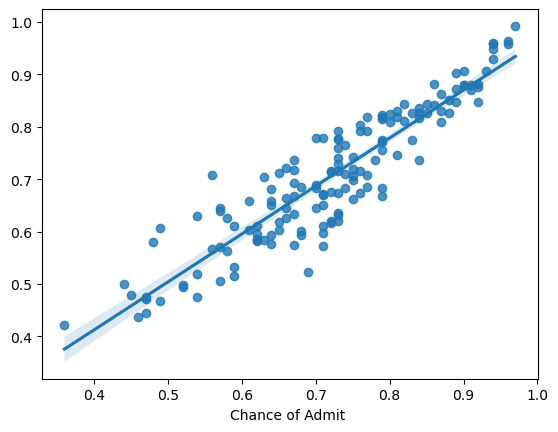

In [1747]:
sns.regplot(y_test,y_pred)

### RESIDUALS PLOT

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

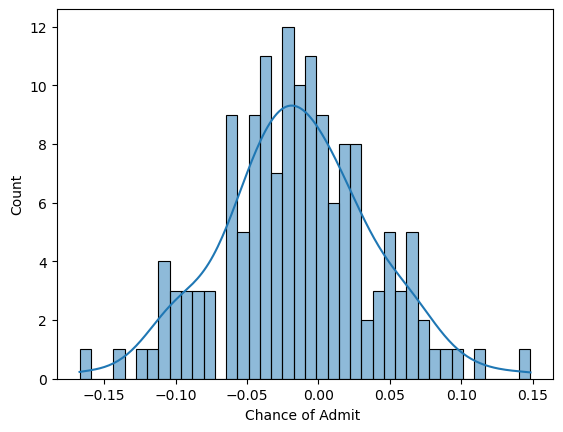

In [1748]:
residuals=y_pred-y_test
sns.histplot(residuals,bins=40,kde=True)

### SHAPIRO TEST FOR NORMALITY OF RESIDUALS

In [1749]:
stat, p_val=shapiro(residuals)
print(p_val)
if p_val<0.05:
    print('Not Gaussian Distribution')
else:
    print('Gaussian Distribution')

0.9182864427566528
Gaussian Distribution


p_value is higher than significance level of 5%, therefore null hypothesis ( distribution is normal ) is not rejected 

The distribution is a normal distribution

**4. Mean of Residuals**

In [1750]:
np.mean(residuals)

-0.014932246470440794

Mean of residuals is very close to 0

**5. No heteroscedasticity**

<AxesSubplot:ylabel='Chance of Admit '>

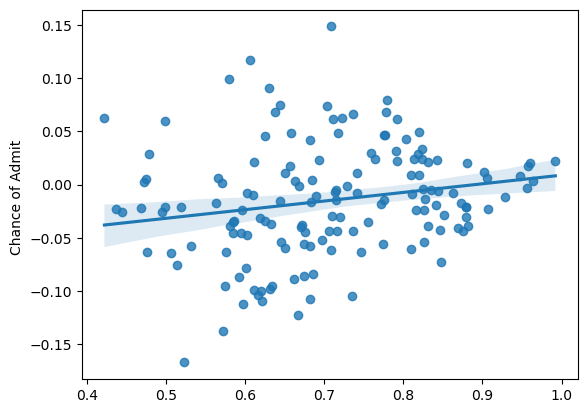

In [1751]:
sns.regplot(x=y_pred,y=residuals)

In [1752]:
#-------------------GOLDFELD QUANDT TEST FOR HOMOSCEDASTICITY---------------------------------#
# Null hypothesis : There is homoscedasticity
# Alternate hypothesis : There is heteroscedasticity
import statsmodels.stats.api as sms
stat,p_val,random_=sms.het_goldfeldquandt(x=X_train_scaled_df,y=y_train)
print(p_val)

0.5275351610454977


Since p_value is greater than significance level of 5%, we fail to reject null hypothesis. Therefore there is **no heteroscedasticity**

**Note :** <br>
Since all the assumptions of linear regression is met, it can be used for building the model <br>
Check for optimization using Polynomial Regression / Lasso / Ridge model along with hyper parameter tuning will be done next and based on the performance, final model will be selected

### HYPER PARAMETER TUNING OF DEGREE FOR POLYNOMIAL REGRESSION MODEL

In [1753]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree),StandardScaler(),LinearRegression())

model=polynomial_regression()

param_grid={
           'polynomialfeatures__degree':np.arange(1,5)}
scoring='neg_root_mean_squared_error'
model_grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
model_grid.fit(X_train,y_train)

print(model_grid.best_params_)
print(model_grid.best_score_)

{'polynomialfeatures__degree': 1}
-0.06163147907284929


Degree = 1 is the optimum hyper parameter values for LR model with minimum RMSE

### HYPER PARAMETER TUNING OF DEGREE & ALPHA FOR LASSO MODEL

In [1754]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree),StandardScaler(),Lasso())

model=polynomial_regression()

param_grid={'lasso__alpha':[1e-15,1e-10,1e-5,0.0001,0.001,0.01,0.1,1,10,20,30,40,50,60,70,80],
           'polynomialfeatures__degree':np.arange(1,5)}

scoring='neg_root_mean_squared_error'
model_grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
model_grid.fit(X_train,y_train)

print(model_grid.best_params_)
print(model_grid.best_score_)

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 2}
-0.061231723421816264


Degree = 2 & alpha = 0.001 is the optimum hyper parameter values for Lasso model with minimum RMSE

### HYPER PARAMETER TUNING OF DEGREE & ALPHA FOR RIDGE MODEL

In [1755]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree),StandardScaler(),Ridge())

model=polynomial_regression()

param_grid={'ridge__alpha':[1e-15,1e-10,1e-5,0.0001,0.001,0.01,0.1,1,10,20,30,40,50,60,70,80],
           'polynomialfeatures__degree':np.arange(1,5)}

scoring='neg_root_mean_squared_error'
model_grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
model_grid.fit(X_train,y_train)

print(model_grid.best_params_)
print(model_grid.best_score_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
-0.06150997409839989


Degree = 2 & alpha = 10 is the optimum hyper parameter values for Ridge model with minimum RMSE

### FINAL HYPER PARAMETER VALUES

**Polynomial Regression ---> Degree=1 <br>
Lasso Regression        ---> Degree=2, alpha=0.001<br>
Ridge Regression        ---> Degree=2, alpha=10**

Next process will be to check the performance of Polynomial Regression / Lasso / Ridge models with the optimum hyper parameter values arrived in the above steps and choose the best model

### FUNCTION TO CALCULATE MODEL PERFORMANCE

In [1756]:
def adj_square(X,r2):
#********************************FUNCTION TO CALCULATE ADJUSTED R2*************************************************#
    n=X.shape[0]
    d=X.shape[1]
    return (1-(((1-r2)*(n-1))/(n-d-1)))

def model_scores(model,X_train_scaled,y_train,X_test_scaled,y_test):
    
    model.fit(X_train_scaled,y_train)
    y_train_hat=model.predict(X_train_scaled)
    y_test_hat=model.predict(X_test_scaled)
    
    print('***************************************PERFORMANCE ON TRAIN DATA************************************************')
    print('R2_SCORE_TRAIN : ', r2_score(y_train,y_train_hat))
    print('ADJUSTED_R2_SCORE_TRAIN : ', adj_square(X_train_scaled,r2_score(y_train,y_train_hat)))
    print('RMSE_TRAIN : ', np.sqrt(mean_squared_error(y_train,y_train_hat)))
    print('MAE_TRAIN : ', np.sqrt(mean_absolute_error(y_train,y_train_hat)))

    print('***************************************PERFORMANCE ON TEST DATA************************************************')
    print('R2_SCORE_TEST: ', r2_score(y_test,y_test_hat))
    print('ADJUSTED_R2_SCORE_TEST : ', adj_square(X_test_scaled,r2_score(y_test,y_test_hat)))
    print('RMSE_TEST : ', np.sqrt(mean_squared_error(y_test,y_test_hat)))
    print('MAE_TEST : ', np.sqrt(mean_absolute_error(y_test,y_test_hat)))

### MODEL PERFORMANCE OF POLYNOMIAL REGRESSION MODEL

In [1757]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree=1),StandardScaler(),LinearRegression())

model=polynomial_regression()

model_scores(model,X_train,y_train,X_test,y_test)

***************************************PERFORMANCE ON TRAIN DATA************************************************
R2_SCORE_TRAIN :  0.82125224204187
ADJUSTED_R2_SCORE_TRAIN :  0.817572141142732
RMSE_TRAIN :  0.06071856829655033
MAE_TRAIN :  0.20728798820469663
***************************************PERFORMANCE ON TEST DATA************************************************
R2_SCORE_TEST:  0.8224198607557156
ADJUSTED_R2_SCORE_TEST :  0.8136659102295889
RMSE_TEST :  0.05407258422468941
MAE_TEST :  0.2070295938019728


### MODEL PERFORMANCE OF LASSO MODEL

In [1758]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree=2),Lasso(alpha=0.001))

model=polynomial_regression()

model_scores(model,X_train,y_train,X_test,y_test)

***************************************PERFORMANCE ON TRAIN DATA************************************************
R2_SCORE_TRAIN :  0.8284272626078957
ADJUSTED_R2_SCORE_TRAIN :  0.8248948827204112
RMSE_TRAIN :  0.05948745116044474
MAE_TRAIN :  0.2046945426639345
***************************************PERFORMANCE ON TEST DATA************************************************
R2_SCORE_TEST:  0.8281725712579526
ADJUSTED_R2_SCORE_TEST :  0.8197022050523588
RMSE_TEST :  0.05318953276161046
MAE_TEST :  0.20538032922852875


### MODEL PERFORMANCE OF RIDGE MODEL

In [1759]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge(alpha=10))

model=polynomial_regression()

model_scores(model,X_train,y_train,X_test,y_test)

***************************************PERFORMANCE ON TRAIN DATA************************************************
R2_SCORE_TRAIN :  0.8250374249854528
ADJUSTED_R2_SCORE_TRAIN :  0.8214352543233887
RMSE_TRAIN :  0.060072236619725175
MAE_TRAIN :  0.20674763364971446
***************************************PERFORMANCE ON TEST DATA************************************************
R2_SCORE_TEST:  0.8236679728126989
ADJUSTED_R2_SCORE_TEST :  0.8149755489372685
RMSE_TEST :  0.05388222609054432
MAE_TEST :  0.2064335956158209


## INSIGHTS

1. CGPA is having the highest weightage followed by GRE Score, TOEFL Score, LOR rating,  Research experience
2. SOP & University rating has very less significance on chance of admission
3. Lasso model is having the best performance with highest Adjusted R2_Score = 82% and least RMSE of 0.0531
4. The model has lesser bias for predictions more than 0.75-0.8 and there is high bias for predictions less than the mentioned range
5. There is very less multi collinearity between the features

## RECOMMENDATIONS

1. More training datapoints required especially with chance of predict less than 0.75 since the bias is very high in that range
2. More feature addition like course details, industry work experience etc.. can increase the model score and reduce the overall bias
3. Bias can be further reduced by trying other ML or DL models and checking the performance
4. Possibility of additional feature engineering / feature creation to be looked and check the performance